<a href="https://colab.research.google.com/github/Ash99-commits/ML_Health_Insurance_Customers_CrossSell_Prediction/blob/main/Health2Vehicle_CrossSell_Insurance_Prediction_by_Ashwani_Kumar_Patra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name : **Health Insurance Customers CrossSell Prediction (Classification)**

# Problem Statement

Our client, a leading Insurance provider, is looking to strategically broaden its portfolio by introducing Vehicle Insurance to its existing Health Insurance customer base. A key business challenge lies in identifying which policyholders are most likely to engage with this new product. Addressing this challenge requires a predictive, data-driven approach that can accurately forecast customer interest and guide targeted marketing efforts.

The project focuses on developing a machine learning model designed to estimate the probability of customers purchasing Vehicle Insurance. This model will leverage a wide range of variables, including demographic details (age, gender, region), vehicle-related factors (vehicle age, damage history), and insights from their current health insurance policies (premium size, distribution channels, and policy details). By uncovering hidden patterns within these attributes, the model aims to highlight customers with the highest conversion potential.

# Project Summary

A structured process is followed:

* Exploratory Data Analysis (EDA): To extract meaningful insights about customer behavior and product engagement.

* Feature Engineering: To enhance and refine data for optimal predictive power.

* Model Development & Validation: To build a reliable predictive analytics solution for business use.

Upon deployment, the solution is expected to optimize marketing efficiency, enabling the client to reach the right customers with the right offer at the right time. This not only reduces acquisition costs but also enhances customer experience and contributes to higher revenue growth through improved conversion rates.

Ultimately, this project delivers a scalable, data-driven decision-support system that empowers the insurance company to make informed, targeted, and impactful marketing decisions for its Vehicle Insurance expansion strategy.

# Dataset Features/Columns Description

**id:** Identifier for each customer.

**Gender:** Gender of the policyholder.

**Age:** Age of the policyholder.

**Driving_License:** Indicates whether the policyholder has a driving license (1 for yes, 0 for no).

**Region_Code:** Coded representation of the region of the policyholder.

**Previously_Insured:** Indicates whether the policyholder already has vehicle insurance (1 for yes, 0 for no).

**Vehicle_Age:** Age of the vehicle.

**Vehicle_Damage:** Indicates whether the vehicle was previously damaged (Yes or No).

**Annual_Premium:** The amount of premium paid annually by the policyholder.

**Policy_Sales_Channel:** Code for the channel of outreach to the policyholder.

**Vintage:** Number of days the policyholder has been associated with the company.

**Response:** Target variable indicating whether the policyholder is interested in vehicle insurance (1 for interested, 0 for not interested).

# Importing Data

In [12]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the Dataset via my Github Repository

data = pd.read_csv('https://raw.githubusercontent.com/Ash99-commits/ML_Health_Insurance_Customers_CrossSell_Prediction/main/Health_Insurance_Customers_Dataset.csv')

In [3]:
# Peeking onto the dataset

data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
# Checking the number of rows and columns in the dataset

data.shape
print('Number of rows in dataset is',data.shape[0])
print('Number of columns in dataset is',data.shape[1])

Number of rows in dataset is 381109
Number of columns in dataset is 12


# Preparing Data before Analysis

## Checking for Duplicates

In [5]:
# Checking for the duplicated values

data.duplicated().sum()

np.int64(0)

👉 There are no duplicated values in the dataset.

## Checking for other informations like Null/Missing values & Column datatypes

In [6]:
# Checking out the dataset informations for the datatypes of the columns and missing/null values.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


👉 All the datatypes in the columns are consistent for the kind of data they hold, no changes necessary.

👉 It also seems from here that there are no null/missing values in the dataset.
Still will be checking out below for confirmation.

# Double checking for Null/Missing Values

In [7]:
# Confirming that there are no null/missing values in the dataset

data.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


👉 Hence confirmed that there are no null/missing values in the dataset.

👉 With the data quality check complete and no immediate issues identified, we now proceed to the statistical summary of the dataset part now.

# Going through the Statistical Summary of the dataset

In [8]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## Observations found

1. Age :-
  * Range: 20 → 85 years (minimum policy age is 20).
  * Mean = 38.8 years → average customer is late 30s.
  * 25% = 25 years, 50% = 36 years, 75% = 49 years → spread shows a fairly balanced age distribution, skewed slightly younger.
  * Std = 15.5 → customers cover a wide age range.
2. Driving_License :-
  * Almost all have licenses: mean = 0.998 (99.8%).
  * Std very small (0.046) → confirms very few customers don’t have a license.
3. Region_Code :-
  * Range: 0 → 52
  * Mean = 26.4, median = 28 → customers spread evenly across regions.
  * Std = 13.2 → moderate spread, indicating wide coverage across regions.
4. Previously_Insured :-
  * Mean = 0.458 → Nearly 46% already had insurance before.
  * Balanced dataset, almost half insured, half not.
5. Annual_Premium :-
  * Range: 2,630 → 540,165 → very skewed distribution (some extreme outliers).
  * Mean = 30,564, Median ≈ 31,669 → close, but presence of very high values inflates max.
  * 25% = 24,405, 75% = 39,400 → most customer's premiums fall in 24k–39k range.
  * Std = 17,213 → wide variation but mainly due to outliers.
6. Policy_Sales_Channel :-
  * Range: 1 → 163
  * Mean = 112, Median = 133 → higher channels slightly more used.
7. Vintage :-
  * Range: 10 → 299 days
  * Mean = 154 days, Median = 154 → very balanced.
  * Std = 83.6 → spread is wide; customers vary from very new (around 10 days) to almost a year (around 299 days).
8. Response (target variable: 1 = purchased policy) :-
  * Mean = 0.123 → only 12.3% customers responded positively.
  * Imbalanced dataset (positive class underrepresented).
  * Std = 0.328 confirms strong imbalance.

## Key Insights found from the observations :-

1. Dataset is large & clean (no missing values).
2. Most customers are young to middle-aged (25–49).
3. Nearly all customers have driving licenses.
4. ~46% already insured, making new policy sales harder.
5. Annual_Premium is skewed with outliers, but most values fall in 24k–39k range.
6. Vintage is well spread from very new to almost a year old customers.
7. Only 12% conversion rate, so model has to deal with class imbalance problem.

[A class imbalance problem happens when one class (like “No”) has way more data points than the other class (like “Yes”). In our case nearly 88% customers said No.]

# Exploratory Data Analysis (EDA)

## Chart 1 - Age Distribution (Histogram - With KDE curve)

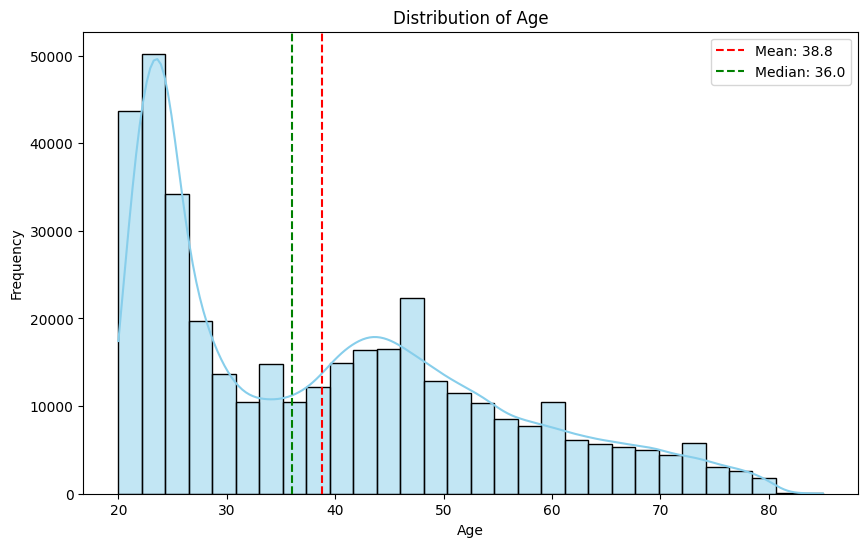

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, color="skyblue", bins=30)

# Adding Titles and labels
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Adding annotations (mean, median)
mean_age = data['Age'].mean()
median_age = data['Age'].median()

plt.axvline(mean_age, color='red', linestyle='--', label=f'Mean: {mean_age:.1f}')
plt.axvline(median_age, color='green', linestyle='--', label=f'Median: {median_age:.1f}')

plt.legend()
plt.show()

### Insights Generated :-

1. **Right-skewed distribution**: Most individuals are younger, with frequency declining steadily as age increases.
2. **Mean vs. Median**: Mean age (38.8) is higher than median (36.0), confirming the skew and presence of older outliers.
3.  **Demographic concentration**: The bulk of the population falls between ages 20–40, indicating a youthful demographic.


## Chart 2 - Distribution of Annual Premium (Full Dataset) - For Reference

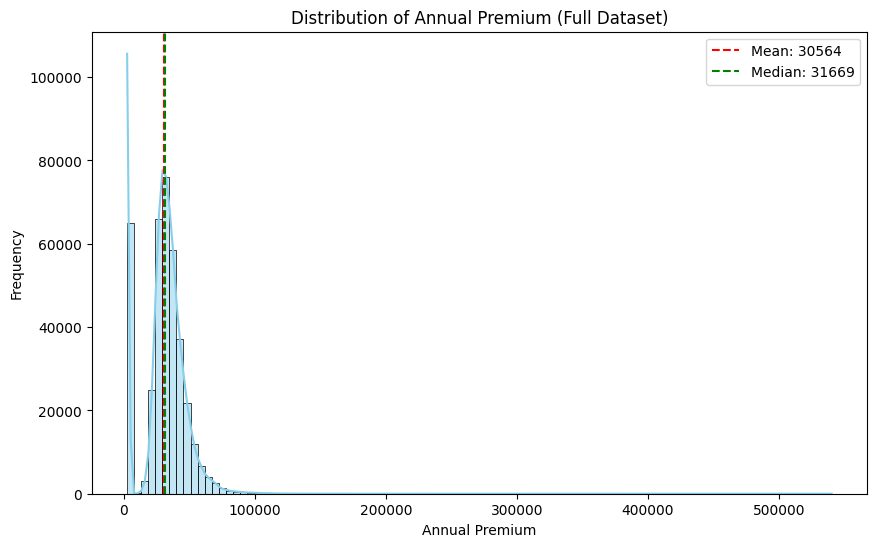

In [13]:
# Distribution of Annual Premium (Full Dataset)

plt.figure(figsize=(10, 6))
sns.histplot(data['Annual_Premium'], bins=100, kde=True, color="skyblue")

plt.title('Distribution of Annual Premium (Full Dataset)')
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')

# Mean & median from full dataset
mean_premium = data['Annual_Premium'].mean()
median_premium = data['Annual_Premium'].median()

# Add mean & median lines
plt.axvline(mean_premium, color='red', linestyle='--', label=f'Mean: {mean_premium:.0f}')
plt.axvline(median_premium, color='green', linestyle='--', label=f'Median: {median_premium:.0f}')

plt.legend()
plt.show()

❌ Problem: These outliers inflated the mean and compressed the bulk of data into a narrow range, making patterns hard to interpret.

✅ Solution: Capping at 100k will help us reduce skew, improve visibility of central trends, and stabilize model training.


## Chart 2 - Distribution of Annual Premium (Capped at 100k)

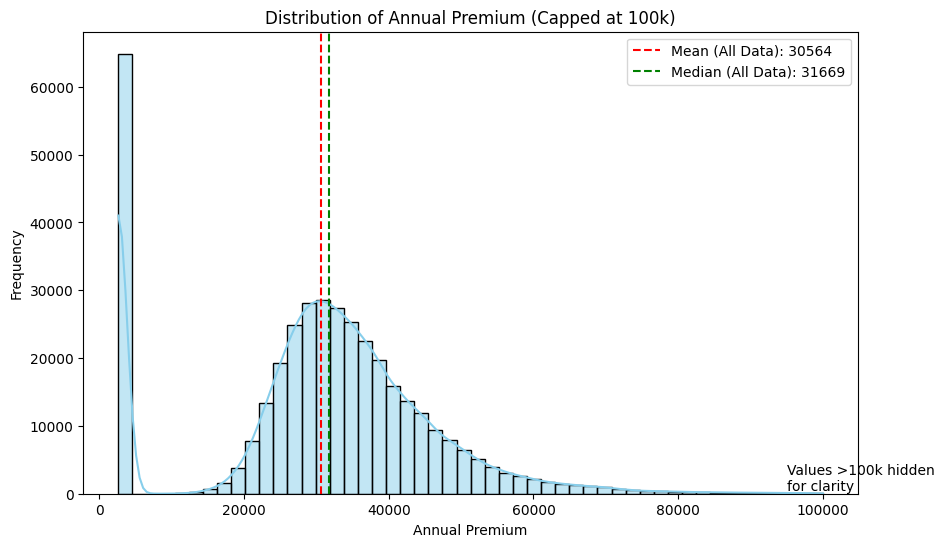

In [14]:
# Finding out the distribution of Annual Premium (Capping at 100k)

plt.figure(figsize=(10, 6))
sns.histplot(
    data[data['Annual_Premium'] < 100000]['Annual_Premium'],
    bins=50, kde=True, color="skyblue"
)

plt.title('Distribution of Annual Premium (Capped at 100k)')
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')

# Mean & median from full dataset
mean_premium = data['Annual_Premium'].mean()
median_premium = data['Annual_Premium'].median()

# Plot lines (they may fall outside the visible range if >100k)
plt.axvline(mean_premium, color='red', linestyle='--', label=f'Mean (All Data): {mean_premium:.0f}')
plt.axvline(median_premium, color='green', linestyle='--', label=f'Median (All Data): {median_premium:.0f}')

# Annotating cutoff
plt.text(95000, 500, 'Values >100k hidden\nfor clarity', color='black')

plt.legend()
plt.show()


### Insights Generated :-

1. **Right skew remains**: Even after capping, the distribution shows a long tail, indicating a small group with relatively high premiums.
2. **Potential for log transformation**: The skew suggests applying log or Box-Cox transformation to stabilize variance and improve model performance.
3. **Segmentation opportunity**: The dense cluster of low premiums vs. sparse high premiums hints at distinct customer segments worth modeling separately.


## Chart 3 - Distribution of Vintage - Histogram with KDE Curve

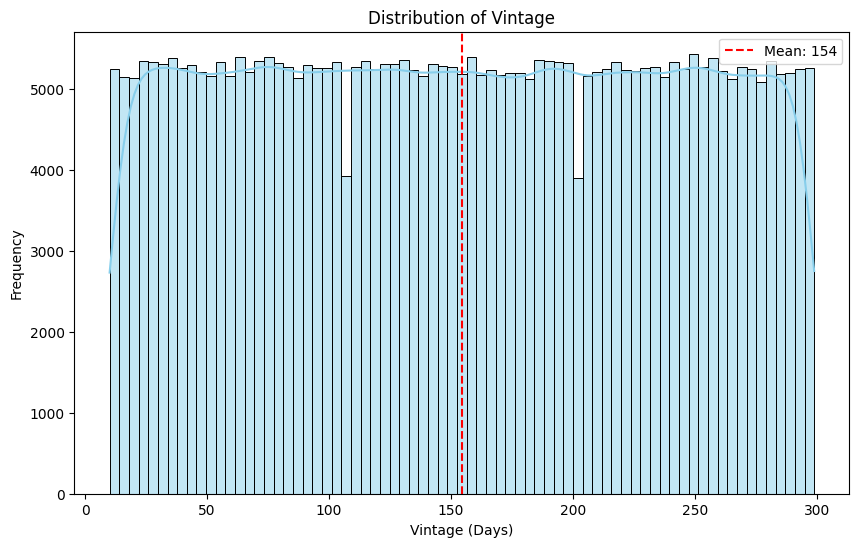

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Vintage'], kde=True, color="skyblue")

plt.title('Distribution of Vintage')
plt.xlabel('Vintage (Days)')
plt.ylabel('Frequency')

mean_vintage = data['Vintage'].mean() # mean line
plt.axvline(mean_vintage, color='red', linestyle='--', label=f'Mean: {mean_vintage:.0f}')
plt.legend()

plt.show()

### Insights Generated :-

1. **Centered around 154 days**: Most customers have been onboard for ~5 months, suggesting a relatively recent user base.
2. **Symmetric distribution**: The shape appears roughly bell-shaped, indicating consistent onboarding over time without major spikes or drop-offs.
3. **Useful for cohort segmentation**: Vintage can help segment users into early vs. recent adopters, aiding churn prediction or lifecycle modeling.


## Chart 4 - Distribution of Response Variable - Countplot

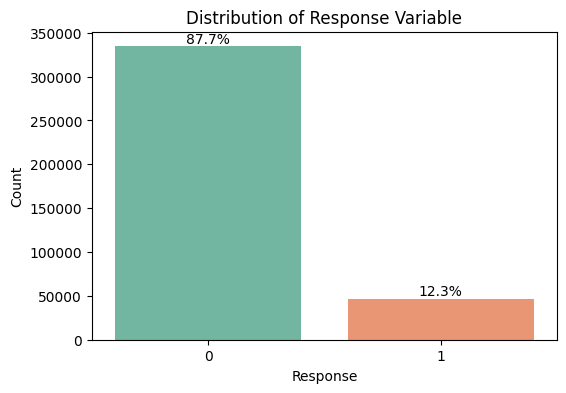

In [18]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Response', data=data, order=data['Response'].value_counts().index, palette="Set2", hue='Response', legend=False)

plt.title('Distribution of Response Variable')
plt.xlabel('Response')
plt.ylabel('Count')

# Adding percentages on bars
total = len(data)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

### Insights Generated :-

1. **Severe class imbalance**: Class "0" dominates at 87.7%, which can bias models toward predicting the majority class.
2. **Need for balancing techniques**: We need to apply resampling (SMOTE, undersampling) or class-weight adjustments to improve model sensitivity to minority class "1".
3. **Evaluation metric shift**: Accuracy alone is misleading here — we need to use precision, recall, F1-score, or AUC to assess model performance effectively


## Chart 5 - Age VS Response - Boxplot

**Age and Response:** To see if there's a particular age group that shows more interest in vehicle insurance.

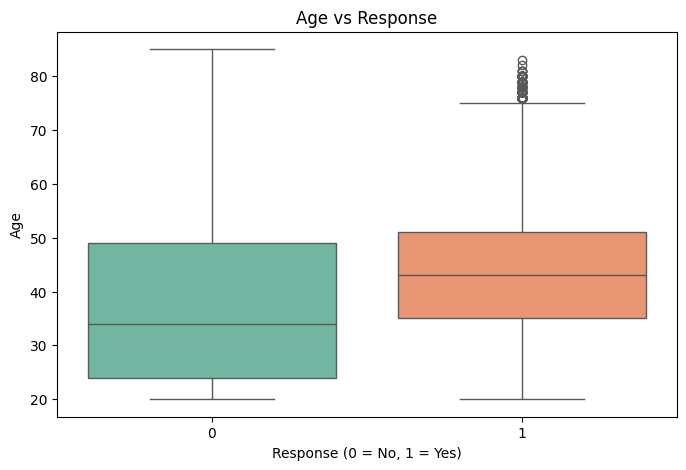

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Response', y='Age', data=data, palette="Set2", hue='Response', legend=False)

plt.title('Age vs Response')
plt.xlabel('Response (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

### Insight Generated :-

1. **Responders are generally older.**
    * Median age of responders (1) ≈ 42 years, compared to ~34 years for non-responders (0).
    * This shows older individuals are more likely to show interest in vehicle insurance.
2. **Younger customers are less interested.**
    * Most non-responders are concentrated in the 20–35 age range.
    * Suggests that younger customers are either less concerned about insurance or already covered elsewhere.
3. **Wider spread among responders.**
    * Responders (1) include a broader range of ages, with some even in 60s–70s showing interest.
    * Non-responders skew much younger, with fewer older individuals refusing insurance.